In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [2]:
from src.data.DBConnection import DBConnection
db = DBConnection()

sql = """
SELECT details 
FROM positions;
"""

corpus = db.cur.execute(sql)

# get first row:
text = corpus.fetchone()

In [89]:
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\12mf3\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\12mf3\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\12mf3\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [126]:
def tokenize(text):
    """Tokenize a string of text.

    Process:
    1. removes next line.
    2. makes all lower case.
    3. removes punctuation.
    4. remove stop words.

    Parameters
    ----------
    text : str
        full text string, no preprocessing yet

    Returns
    -------
    words : list of str
        list of words
    """
    clean_text = text.replace("\n", " ")
    clean_text = clean_text.lower()
    words = ["".join(c for c in s if c not in string.punctuation) for s in clean_text.split(" ")]
    words = [w for w in words if w is not ""]
    words = [w for w in words if w not in stopwords.words("english")]
    return words

In [127]:
# lemmatize:
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from nltk import pos_tag

def wordnet_tags(tag):    
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lematize(words):
    """Lematizes words (need to be preprocessed first)

    Parameters
    ----------
    words : list of str

    Returns
    -------
    list of str
    """
    lemmatizer = WordNetLemmatizer()
    doc = [lemmatizer.lemmatizewords, wordnet_tags(x[1])) for x in pos_tag(words)]
    return doc


In [132]:
from src.data.make_dataset import preprocess_pipeline
doc = preprocess_pipeline(text[0])

doc[:40]

'report performance manager analyst champ'

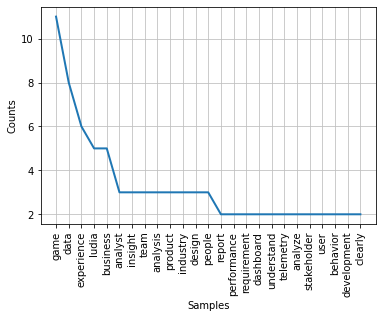

In [131]:
from src.visualization import visualize

fig = visualize.fdist_words(words.split(" "))

In [133]:
db.close()